#### CMSE 202 Final Project
### &#9989; Annalise Cornell, Ren McIntyre, Erika Bartosiewicz
### &#9989; Section 002, Project Environmental 1
#### &#9989; 4/16/2020

# ___Carbon Storage and Sequestration___

## Problem

There are two questions studied within this notebook. The first asks whether numerical factors such as the population and green space (from data taken by Northern Research Station) could be used to predict the community forestry assessment, a tool most commonly used to the present state of wood resources to allow sustainable use of the world's green space. Beyond just use of wood, trees and forests are important as they might take away from carbon emissions which are of great concern today with the increased output by humans driving climate change. Trees use carbon dioxide in their respiration thus removing it from the Earth's atmosphere. An estimate of biomass is desired so as to obtain an amount of carbon storage, the amount of CO2 naturally stored inside a tree. Increased carbon storage would also mean increased sequestration (taking CO2 out of the atmosphere) and so enhanced benefits in the reduction of a community's carbon footprint. Looking to observe is carbon storage is important to community forestry assessment, a machine learning model is to be made using community biomass and carbon storage as features. 


The second question asks how carbon sequestration from a research forest known as Penobscot Experimental Forest is able to take away from carbon dioxide emissions caused by humans over the past several years, and whether planting more trees might allow a significant reduction in total emissions going into the atmosphere.

## Data

In [2]:
#all imports here

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
summary_data = pd.read_excel("MI_Tables_edited.xls", "1", skiprows = 2)
summary_data.rename(columns = {"Michigan.1": "Statistic", "Urban a": "Urban", "Community b": "Community", "Urban or community c":"Urban or community"}, inplace = True)
summary_data.head()

,Michigan,Statistic,Statewide,Urban,Community,Urban or community
0,Population,2000,9938444,7419457,6384273,NaN
1,Population,1990,9295297,6555842,6073842,NaN
2,Population,% Change (1990-2000),6.91906,13.1732,5.11095,NaN
3,Population,% Total population (2000),100,74.6541,64.2382,NaN
4,Total area,km2 (2000),250494,8879.5,7871.44,11283.6


The dataset above contains summary statistics for the Michigan urban forest data.

In [4]:
pop_and_urban_land = pd.read_excel("MI_Tables.xls", "2", skiprows = 3)
pop_and_urban_land.rename(columns = {"Unnamed: 0": "Community Name", 2000: "Population in 2000", "%": "% Urban Land", "% Change from 1990.1": "% urban change from 1990"}, inplace = True)
pop_and_urban_land.head()

,Community Name,Population in 2000,% Change from 1990,Density (people/km2),% Urban Land,% urban change from 1990
0,Addison village,627,-0.007911,248.105093,0.000000,NaN
1,Adrian city,21574,-0.023668,1167.386317,0.928864,0.004382
2,Ahmeek village,157,0.060811,864.120335,0.000000,NaN
3,Akron village,461,0.095012,186.667543,0.000000,NaN
4,Alanson village,785,0.159527,311.907842,0.000000,NaN


This dataset pertains to population and urban percentage statistics for Michigan urban forest data.

In [5]:
mi_canopy_data_by_community = pd.read_excel("MI_Tables.xls", "5", skiprows = 3, usecols = (0, 4, 5, 6, 7))
mi_canopy_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Unnamed: 1": "Mapping Zone", "%": "% Impervious surface cover", "m2/person": "Impervious surface cover m2/person", "%.1": "% Tree Canopy Cover", "m2/person.1": "Tree Canopy Cover m2/person"}, inplace = True)
mi_canopy_data_by_community.head()

,Community Name,% Tree Canopy Cover,Tree Canopy Cover m2/person,Total green space (ha),Canopy green space %
0,Addison village,0.110675,459.272727,232.9780,0.123601
1,Adrian city,0.085301,73.550107,1146.7500,0.138371
2,Ahmeek village,0.185460,184.987261,10.5417,0.275506
3,Akron village,0.037486,200.889371,224.3340,0.041282
4,Alanson village,0.357788,1192.459873,231.0580,0.405128


This shows the green cover by county in Michigan. The column that is of the most importance here is the Total green space (ha) 

In [6]:
land_data_by_community = pd.read_excel("MI_Tables.xls", "8", skiprows = 3)
land_data_by_community.rename(columns = {"Unnamed: 0": "Community Name", "Land area km2": "Developed land area km2", "Land area %": "Developed land area %", "Tree % h": "Developed tree % h", "AGS % i": "Developed AGS % i", "Land area km2.1": "Barren land area km2", "Land area %.1": "Barren land area %", "Tree % h.1": "Barren tree % h", "AGS % i.1": "Barren AGS % i", "Land area km2.2": "Forested land area km2", "Land area %.2": "Forested land area %", "Tree % h.2": "Forested tree % h", "AGS % i.2": "Forested AGS % i", "Land area km2.3": "Scrub land area km2", "Land area %.3": "Scrub land area %", "Tree % h.3": "Scrub tree % h", "AGS % i.3": "Scrub AGS % i", "Land area km2.4": "Grassland land area km2", "Land area %.4": "Grassland land area %", "Tree % h.4": "Grassland tree % h", "AGS % i.4": "Grassland AGS % i", "Land area km2.5": "Agricultural land area km2", "Land area %.5": "Agricultural land area %", "Tree % h.5": "Agricultural tree % h", "AGS % i.5": "Agricultural AGS % i", "Land area km2.6": "Wetland land area km2", "Land area %.6": "Wetland land area %", "Tree % h.6": "Wetland tree % h", "AGS % i.6": "Wetland AGS % i"}, inplace = True)
land_data_by_community.head()

,Community Name,Developed land area km2,Developed land area %,Developed tree % h,Developed AGS % i,Barren land area km2,Barren land area %,Barren tree % h,Barren AGS % i,Forested land area km2,...,Grassland tree % h,Grassland AGS % i,Agricultural land area km2,Agricultural land area %,Agricultural tree % h,Agricultural AGS % i,Wetland land area km2,Wetland land area %,Wetland tree % h,Wetland AGS % i
0,Addison village,0.8703,0.334486,0.068966,0.618356,0.0045,0.001730,0.028000,0.972000,0.2358,...,0.011111,0.988889,1.4553,0.559322,0.081132,0.918869,0.0198,0.007610,0.105000,0.895000
1,Adrian city,17.6571,0.949199,0.068349,0.527746,0.0306,0.001645,0.000000,1.000000,0.2754,...,0.000000,1.000000,0.5895,0.031690,0.319115,0.680885,0.0486,0.002613,0.392593,0.607407
2,Ahmeek village,0.1395,0.890805,0.150903,0.482194,0.0000,0.000000,NaN,NaN,0.0144,...,NaN,NaN,0.0027,0.017241,0.530000,0.470000,0.0000,0.000000,NaN,NaN
3,Akron village,0.7101,0.287432,0.057921,0.622180,0.0000,0.000000,NaN,NaN,0.0738,...,0.000000,1.000000,1.6767,0.678689,0.011111,0.988889,0.0000,0.000000,NaN,NaN
4,Alanson village,1.1007,0.420709,0.115789,0.606631,0.0063,0.002408,0.268571,0.731429,0.4851,...,0.194021,0.805979,0.6318,0.241486,0.558476,0.441524,0.1152,0.044032,0.163594,0.836406


This is the many different land cover types surveyed in all of the counties in Michigan

In [7]:
assessment_stats = pd.read_excel("MI_Tables_edited.xls", "11", skiprows = 3, usecols = (3, 4, 5, 6, 7))
assessment_stats.rename(columns = {"Unnamed: 3": "n", "Maximum": "Tree Canopy Cover Maximum", "Minimum": "Tree Canopy Cover Minimum", "Median": "Tree Canopy Cover Median", "Weighted mean d": "Tree Canopy Cover Weighted Mean"}, inplace = True)
assessment_stats.head()

,n,Tree Canopy Cover Maximum,Tree Canopy Cover Minimum,Tree Canopy Cover Median,Tree Canopy Cover Weighted Mean
0,69,0.8868,0.0100,0.50070,0.560652
1,86,0.8449,0.0089,0.23295,0.304143
2,90,0.7005,0.0116,0.24705,0.321387
3,61,0.6696,0.0114,0.15050,0.276733
4,58,0.5227,0.0220,0.14090,0.179855


This data shows the tree canopy cover in our area of interest (Michigan)

In [8]:
community_assessment = pd.read_excel("MI_Tables.xls", "12", skiprows = 2)
community_assessment.head()

,Name,Mapping zone,Rating
0,Addison village,51,Poor
1,Adrian city,51,Poor
2,Ahmeek village,51,Fair
3,Akron village,51,Poor
4,Alanson village,51,Good


This dataset contains the community forestry assessment ratings for all Michigan communities.

In [9]:
known_biomass = pd.read_excel("knownBiomass.xlsx")
known_biomass.rename(columns = {"Unnamed: 0": "Type"}, inplace = True)
known_biomass.head()

,Type,Mean biomass 1,Mean biomass 2,Mean biomass 3,Area (Mha),Total biomass (Mg×10^6),Percentage of total biomass (%)
0,Northern hardwood,56.6,60.7,56.6,11.0,621.3,12.6
1,Northern mixedwood,63.3,69.7,63.3,9.8,620.9,12.6
2,Boreal (commercial),50.6,56.1,50.6,37.5,1897.3,38.4
3,Boreal (noncommerical),36.2,41.4,36.2,17.7,640.1,13.0
4,Taiga,23.8,28.2,23.8,29.5,702.0,14.2


The data above is from a paper where biomass is evaluated for different areas of different cover types. Because the data for our experiment is not specific to any one cover type, we have decided to construct a regression model to best fit all forest types based only on area. 

In [10]:
data = pd.read_csv('MID_Overstory_Trees_and_Saplings_2000-2011.csv')


data['DBH'] = data['DBH'] * 2.54 #convert inches to cm

#add parameter values to fill
data['B0'] = np.nan
data['B1'] = np.nan
data['agb'] = np.nan
data['co2'] = np.nan

#view data
data.head()

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,NaN,NaN,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,NaN,NaN,NaN,NaN
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,NaN,NaN,NaN,NaN
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,NaN,NaN,NaN,NaN
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,NaN,NaN,NaN,NaN


In [11]:
emissions_pre = pd.read_excel("maine.xlsx", skiprows = 2)[:-1]
emissions_pre.drop(range(1,38),  inplace = True)
emissions = emissions_pre.transpose()
emissions.drop(["Unnamed: 0", "Unnamed: 1"], inplace= True)
emissions.rename(columns = {0:"Year", 38:"Total CO2 Emissions (Million metric tons)"}, inplace = True)
emissions.head()

,Year,Total CO2 Emissions (Million metric tons)
Unnamed: 2,1980,14.4662
Unnamed: 3,1981,14.3104
Unnamed: 4,1982,17.5707
Unnamed: 5,1983,13.3214
Unnamed: 6,1984,15.2295


The dataset above contans information on total Maine CO2 emissions from sources such as coal and oil. The datset above is from Maine so main is used to match.

## Model Part 1 - Rating Estimation

In [12]:
#making a new dataset to use as features for machine learning
community_evaluation = pd.concat([pop_and_urban_land["Population in 2000"],pop_and_urban_land["Density (people/km2)"],pop_and_urban_land["% Urban Land"],mi_canopy_data_by_community["Total green space (ha)"]], axis = 1)
community_evaluation.head()

,Population in 2000,Density (people/km2),% Urban Land,Total green space (ha)
0,627,248.105093,0.000000,232.9780
1,21574,1167.386317,0.928864,1146.7500
2,157,864.120335,0.000000,10.5417
3,461,186.667543,0.000000,224.3340
4,785,311.907842,0.000000,231.0580


In [13]:
#splitting up training and testing sets
x_train, x_test, y_train, y_test = train_test_split(community_evaluation, community_assessment["Rating"], test_size=0.30)

In [14]:
#RandomForestClassifier is another way to do machine learning 

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

predict = rfc.predict(x_test)
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00         6
        Fair       0.42      0.33      0.37        67
        Good       0.10      0.10      0.10        29
        Poor       0.46      0.59      0.52        74
   Very Good       0.25      0.15      0.19        13

    accuracy                           0.38       189
   macro avg       0.25      0.24      0.24       189
weighted avg       0.36      0.38      0.36       189



C:\Users\Annalise\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The mean-squared error of the regression model is 89459.25 and the coefficient of determination is 0.96.
The slope of the linear regression line is [[0.0388314]] and the y-intercept is [4.13654568] .


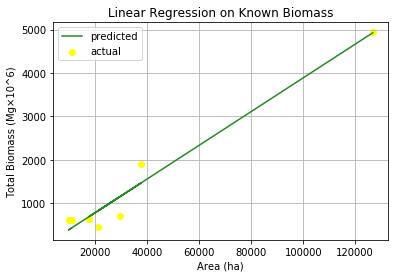

In [15]:
#create shorter labels
known_area = pd.DataFrame(known_biomass["Area (Mha)"]*1000)
known_bio = pd.DataFrame(known_biomass["Total biomass (Mg×10^6)"])

#create linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(known_area, known_bio)
known_biomass_predictions = lm.predict(known_area)

#find mean_squared error and r^2
mse = metrics.mean_squared_error(known_bio["Total biomass (Mg×10^6)"], known_biomass_predictions)
cod = metrics.r2_score(known_bio["Total biomass (Mg×10^6)"], known_biomass_predictions)
print("The mean-squared error of the regression model is {:.2f} and the coefficient of determination is {:.2f}.".format(mse, cod))
print("The slope of the linear regression line is", lm.coef_,"and the y-intercept is", lm.intercept_, ".")

#plot results
plt.scatter(known_area, known_bio, label = "actual", color = "yellow")
plt.plot(known_area, known_biomass_predictions, label = "predicted", color = "forestgreen")
plt.title("Linear Regression on Known Biomass")
plt.xlabel("Area (ha)")
plt.ylabel("Total Biomass (Mg×10^6)")
plt.legend()
plt.grid()
plt.savefig("linreg.png")

The regression line between the known estimates is used a training set to determine the relationship between vegetation coverage and biomass. 

,Community Name,% Tree Canopy Cover,Tree Canopy Cover m2/person,Total green space (ha),Canopy green space %,Biomass
0,Addison village,0.110675,459.272727,232.9780,0.123601,13.183409
1,Adrian city,0.085301,73.550107,1146.7500,0.138371,48.666459
2,Ahmeek village,0.185460,184.987261,10.5417,0.275506,4.545895
3,Akron village,0.037486,200.889371,224.3340,0.041282,12.847750
4,Alanson village,0.357788,1192.459873,231.0580,0.405128,13.108852


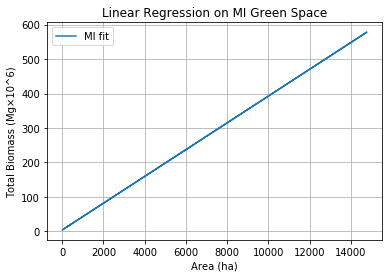

In [129]:
#predicting biomass for MI and adding it as a column as well as plotting
mi_area = pd.DataFrame(mi_canopy_data_by_community["Total green space (ha)"])
mi_biomass_predictions = lm.predict(mi_area)
mi_canopy_data_by_community["Biomass"] = mi_biomass_predictions

plt.plot(mi_area, mi_biomass_predictions, label = "MI fit")
plt.title("Linear Regression on MI Green Space")
plt.xlabel("Area (ha)")
plt.ylabel("Total Biomass (Mg×10^6)")
plt.legend()
plt.grid()

mi_canopy_data_by_community.head()

The regression from the known data set is used on the NFS data to predict above ground biomass (agb)

[42779.41764761]


,Community Name,% Tree Canopy Cover,Tree Canopy Cover m2/person,Total green space (ha),Canopy green space %,Biomass,Carbon Storage
0,Addison village,0.110675,459.272727,232.9780,0.123601,13.183409,24.191555
1,Adrian city,0.085301,73.550107,1146.7500,0.138371,48.666459,89.302952
2,Ahmeek village,0.185460,184.987261,10.5417,0.275506,4.545895,8.341717
3,Akron village,0.037486,200.889371,224.3340,0.041282,12.847750,23.575621
4,Alanson village,0.357788,1192.459873,231.0580,0.405128,13.108852,24.054744


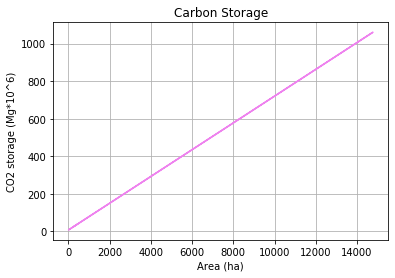

In [130]:
#estimating co2 storage from biomass and then plotting and adding column
co2_storage = mi_biomass_predictions*0.5*3.67
mi_canopy_data_by_community["Carbon Storage"] = co2_storage

print(sum(co2_storage))

plt.plot(mi_canopy_data_by_community["Total green space (ha)"], co2_storage, label = "co2 storage", color = "violet")
plt.title("Carbon Storage")
plt.xlabel("Area (ha)")
plt.ylabel("CO2 storage (Mg*10^6)")
plt.grid()

mi_canopy_data_by_community.head()

The amount of carbon stored in any given tree is 50% of the agb. In the above graph, the carbon storage is being estimated given the predicted agb. 

In [131]:
#making another feature set for machine learning
#want to use just carbon storage and biomass as features for machine learning

community_evaluation_carbon = pd.concat([mi_canopy_data_by_community["Biomass"],mi_canopy_data_by_community["Carbon Storage"]], axis = 1)
community_evaluation_carbon.head()

,Biomass,Carbon Storage
0,13.183409,24.191555
1,48.666459,89.302952
2,4.545895,8.341717
3,12.847750,23.575621
4,13.108852,24.054744


In [132]:
#splitting
x_train, x_test, y_train, y_test = train_test_split(community_evaluation_carbon, community_assessment["Rating"], test_size=0.30)

In [133]:
#getting a fit and confusion matrix
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

predict = rfc.predict(x_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

   Excellent       0.20      0.25      0.22         4
        Fair       0.37      0.37      0.37        62
        Good       0.18      0.24      0.21        29
        Poor       0.43      0.41      0.42        82
   Very Good       0.20      0.08      0.12        12

    accuracy                           0.35       189
   macro avg       0.28      0.27      0.27       189
weighted avg       0.35      0.35      0.35       189



C:\Users\Annalise\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


As one can see the model is not very accurate in either case although they do return similar results.

## Model Part 2 - Reducing Impact of Carbon Emissions

In [16]:
#assign parameter values (for use in agb equation)
sp = data['USFSspID']

aacw = [18, 24]
mb = [15, 38, 16, 20, 33]
mh = [40, 17, 19, 21, 22, 23, 25, 26, 31, 34, 37, 99]
mohb = [32, 35, 36]

cl = [7, 11]
fir_hem = [1, 6]
pine = [9, 10]
spruce = [2,4,5]


for i in range(len(data)):
    if any(sp[i] == s for s in aacw): #aspen, alder, cottonwood, willow
        data['B0'][i] = -2.2094
        data['B1'][i] = 2.3867
        
    elif any(sp[i] == m for m in mb): #soft maple, birch
        data['B0'][i] = -1.9123
        data['B1'][i] = 2.3651
        
    elif any(sp[i] == o for o in mohb): #hard maple, oak, hickory, beech
        data['B0'][i] = -2.0127
        data['B1'][i] = 2.4342  
    
    elif any(sp[i] == c for c in cl): #cedar, larch
        data['B0'][i] = -2.0336
        data['B1'][i] = 2.2592 
        
    elif any(sp[i] == f for f in fir_hem): #true fir, hemlock
        data['B0'][i] = -2.5384
        data['B1'][i] = 2.4814
        
    elif any(sp[i] == p for p in pine): #pine
        data['B0'][i] = -2.5356
        data['B1'][i] = 2.4349
        
    elif any(sp[i] == s for s in spruce): #spruce
        data['B0'][i] = -2.0773
        data['B1'][i] = 2.3323  
        
    else: #mixed hardwoods
        data['B0'][i] = -2.4800
        data['B1'][i] = 2.4835

C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning

In [17]:
data.head() #viewing

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,-2.0773,2.3323,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,NaN,NaN
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,NaN,NaN
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,NaN,NaN
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,NaN,NaN


In [18]:
#calculate above ground biomass
dbh = data['DBH']
B0 = data['B0']
B1 = data['B1']

def agb(dbh, B0, B1):
    return np.exp(B0 + B1 * np.log(dbh))

for i in range(len(data)):
    if dbh[i] < 2.5:
        data['agb'][i] = np.nan #for our equation to work, dbh must be >= 2.5 cm
    else:
        data['agb'][i] = agb(dbh[i], B0[i], B1[i])
        
data.head()

C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,-2.0773,2.3323,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,NaN
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,NaN
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,NaN
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,NaN


In [19]:
#calculate carbon storage for each 

def calc_co2(agb):
    c = 0.5 * agb #half of a tree's weight is carbon storage
    
    return c * 3.67 #one mass unit of carbon = 3.67 mass units of co2

for i in range(len(data)):
    data['co2'][i] = calc_co2(data['agb'][i])
    
data.head()

C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,4,6,2000,50,1600,1,1.778,100,-2.0773,2.3323,NaN,NaN
1,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,818.857175
2,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,232.014659
3,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,1171.455087
4,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,135.524583


In [20]:
drop_list = []

#trees are uniquely identified by a combination of the following criteria:
psp = data['PSP'] #plot
trees = data['TREENUM'] #tree number
species = data['USFSspID'] #species

#creating a data frame that contains all of the trees with dbh < 2.5
to_drop = data[data['DBH'] < 2.5]
to_drop.index = np.arange(0, len(to_drop))

drop_psp = to_drop['PSP']
drop_trees = to_drop['TREENUM']
drop_species = to_drop['USFSspID']

#collecting all trees that had dbh < 2.5 at some point
for i in range(len(to_drop)):
    i_list = data.index[(psp == drop_psp[i]) & (trees == drop_trees[i]) & (species == drop_species[i])].tolist()
    for j in range(len(i_list)):
        drop_list.append(i_list[j])

co2_estimate = data.drop(drop_list)
co2_estimate.index = np.arange(0, len(co2_estimate))
co2_estimate.head()

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2
0,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,818.857175
1,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,232.014659
2,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,1171.455087
3,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,135.524583
4,1,90,11,20,6,6,2000,5,11700,16,40.386,200,-2.5384,2.4814,764.342654,1402.568770


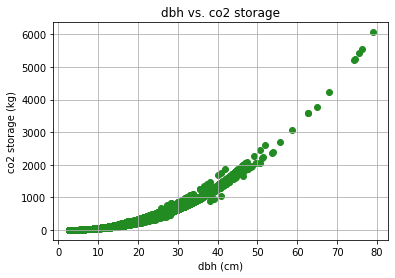

In [21]:
x = co2_estimate['DBH']
y = co2_estimate['co2']

plt.scatter(x, y, color = 'forestgreen')
plt.xlabel('dbh (cm)')
plt.ylabel('co2 storage (kg)')
plt.title('dbh vs. co2 storage')
plt.grid()
plt.savefig("dbh.png")

The mean-squared error of the regression model is 2425.88 and the coefficient of determination is 0.98.
The slope of the linear regression line is [[10771.35924712]] and the y-intercept is [-49.461401] .


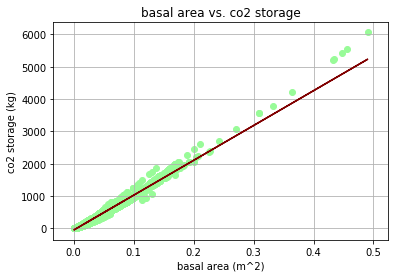

In [22]:
#convert dbh (cm) to basal area (m^2)
x = np.pi * ((co2_estimate['DBH'] * 0.01)/2)**2
x_data = pd.DataFrame(x)
y_data = pd.DataFrame(y)

#create linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(x_data,y_data)
co2_predict_reg = lm.predict(x_data)

#find mean_squared error and r^2
mse = metrics.mean_squared_error(y_data, co2_predict_reg)
cod = metrics.r2_score(y_data, co2_predict_reg)
slope = lm.coef_
print("The mean-squared error of the regression model is {:.2f} and the coefficient of determination is {:.2f}.".format(mse, cod))
print("The slope of the linear regression line is", slope,"and the y-intercept is", lm.intercept_, ".")

plt.scatter(x, y, color = 'palegreen')
plt.plot(x, co2_predict_reg, color = 'maroon')
plt.xlabel('basal area (m^2)')
plt.ylabel('co2 storage (kg)')
plt.title('basal area vs. co2 storage')
plt.grid()
plt.savefig("basal.png")

In [23]:
#getting carbon sequestered
co2_sequestered = []
for val in x:
    co2_sequestered.append(float(val*slope))

co2_sequestered_series = pd.Series(co2_sequestered)
co2_estimate["Basal area (m^2)"] = x
co2_estimate["co2_seq (kg)"] = co2_sequestered_series
co2_estimate.head()

,EXPNUM,MU,PSP,INV,USFSspID,Month,Year,EXPF,TREENUM,DCLASS,DBH,KCODE,B0,B1,agb,co2,Basal area (m^2),co2_seq (kg)
0,1,90,11,20,6,6,2000,5,4600,13,32.512,200,-2.5384,2.4814,446.243692,818.857175,0.083019,894.226971
1,1,90,11,20,6,6,2000,5,4800,8,19.558,200,-2.5384,2.4814,126.438506,232.014659,0.030043,323.600568
2,1,90,11,20,4,6,2000,5,5100,15,38.862,200,-2.0773,2.3323,638.395143,1171.455087,0.118615,1277.646434
3,1,90,11,20,6,6,2000,5,11600,6,15.748,200,-2.5384,2.4814,73.855358,135.524583,0.019478,209.802763
4,1,90,11,20,6,6,2000,5,11700,16,40.386,200,-2.5384,2.4814,764.342654,1402.568770,0.128101,1379.818851


[0.00039205 0.00011557 0.         0.         0.00012067 0.00033606
 0.         0.        ]


C:\Users\Annalise\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


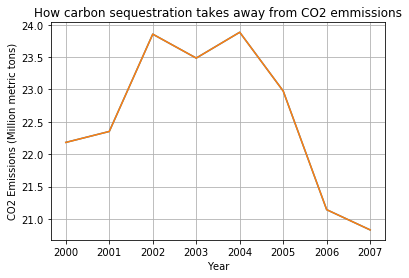

In [26]:
#seeing how carbon sequestration might take away from total carbon emissions
sequestration_list = []

#splitting into datasets by year
data_2000 = co2_estimate[co2_estimate["Year"]==2000]
sequestration_list.append(sum(data_2000["co2_seq (kg)"]))
data_2001 = co2_estimate[co2_estimate["Year"]==2001]
sequestration_list.append(sum(data_2001["co2_seq (kg)"]))
data_2002 = co2_estimate[co2_estimate["Year"]==2002]
sequestration_list.append(sum(data_2002["co2_seq (kg)"]))
data_2003 = co2_estimate[co2_estimate["Year"]==2003]
sequestration_list.append(sum(data_2003["co2_seq (kg)"]))
data_2004 = co2_estimate[co2_estimate["Year"]==2004]
sequestration_list.append(sum(data_2004["co2_seq (kg)"]))
data_2005 = co2_estimate[co2_estimate["Year"]==2005]
sequestration_list.append(sum(data_2005["co2_seq (kg)"]))
data_2006 = co2_estimate[co2_estimate["Year"]==2006]
sequestration_list.append(sum(data_2006["co2_seq (kg)"]))
data_2007 = co2_estimate[co2_estimate["Year"]==2007]
sequestration_list.append(sum(data_2007["co2_seq (kg)"]))

#converting to array to make it easier to work with
sequestration = np.array(sequestration_list)
sequestration = sequestration/(1000*1000000)
print(sequestration)

#plotting
emissions_to_2007 = emissions[emissions["Year"] <= 2007][emissions["Year"] >= 2000]
plt.plot(emissions_to_2007["Year"], emissions_to_2007["Total CO2 Emissions (Million metric tons)"])
plt.plot(emissions_to_2007["Year"], emissions_to_2007["Total CO2 Emissions (Million metric tons)"] - sequestration)
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million metric tons)")
plt.title("How carbon sequestration takes away from CO2 emmissions")
plt.grid()

As can be seen from the cell above the effect of carbon sequestration is almost negilible against human caused carbon dioxide emissions.

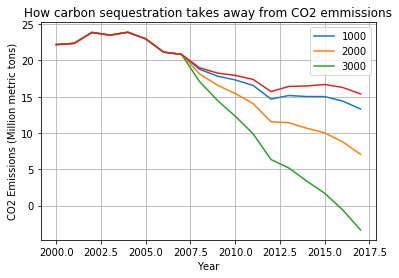

In [28]:
#what would happen if we planted x number of trees each year?
data_from_2000 = emissions[emissions["Year"] >= 2000]

# want to try planting 1000, 2000, 3000 trees/year
#getting sequestration number for x trees planted
tree_numbers = [1000, 2000, 3000]
tree_seq = []
for tree_num in tree_numbers:
    trees_dbh = tree_num*np.mean(co2_estimate["DBH"])
    trees_basal = np.pi * ((trees_dbh * 0.01)/2)**2
    trees_seq = trees_basal*slope
    tree_seq.append(trees_seq)

#initializing seq_list with zeros
seq_list = [0.00039205, 0.00011557, 0., 0., 0.00012067, 0.00033606, 0., 0., 0 , 0, 0, 0, 0 , 0 , 0, 0 ,0 , 0]

#changing the tree_seq list to match sequestration if x amount of trees were plants
inte = 0
for trees in tree_seq:
    inte +=1000
    increase = 0
    for num in range(8,18):
        increase += trees
        seq_list[num] = float(increase)
    #chanigng to array to be easier to work with and plotting
    sequestration = np.array(seq_list)
    sequestration = sequestration/(1000*1000000)
    plt.plot(data_from_2000["Year"], data_from_2000["Total CO2 Emissions (Million metric tons)"] - sequestration, label = inte)
    plt.legend()


plt.plot(data_from_2000["Year"], data_from_2000["Total CO2 Emissions (Million metric tons)"])
plt.xlabel("Year")
plt.ylabel("CO2 Emissions (Million metric tons)")
plt.title("How carbon sequestration takes away from CO2 emmissions")
plt.grid()
plt.savefig("co2_down.png")

## Results and Conclusions

The machine learning model did not work well in either case. It is possible to say that since they both came out with similar accuracies they each impact the community forestry rating equally. This would make sense as carbon storage could also be a judge of urbanacity as increased carbon storage would indicate a more rural area. Better scores should go to more rural areas with high levels of biomass and carbon storage as they appear to have more resources and also create a healthier environment in taking away from carbon emissions.

The carbon sequestration against emissions portions went significantly better as we were able to predict carbon sequestration over several years and saw how it might take away from human emissions. It can be seen that on a base level, the effect of carbon sequestration from trees is negligible against the massive outputs of CO2 into the atmosphere by human activities. This is rather depressing, however, if we were able to plant at least 1,000 trees a year we could make good progress against carbon emissions and with 3000 or more trees a year we could even get to zero. This is only for Maine, which is a very rural state, and it does not take deforestation into account, but this does make the future look optimistic.

Some issues found with this project were datasets that were not well formatted for python and also the fact that forestry data takes a long time and money to collect and so most of it is quite old. It is very hard to find good data to come up with a complex model.

### References

Boudreau et al. (2008). Regional aboveground forest biomass using airborne and spaceborne LiDAR in Québec. Remote Sensing of Environment, Vol 112.(10), 3876-3890. https://doi.org/10.1016/j.rse.2008.06.003

Forest Data. (2013, December 12). Retrieved April 16, 2020, from https://www.nrs.fs.fed.us/data/urban/ 

State Carbon Dioxide Emissions Data. (2019, October 23). Retrieved April 16, 2020, from https://www.eia.gov/environment/emissions/state/Urban

Waskiewicz, Justin D.; Kenefic, Laura S.; Puhlick, Joshua J.; Rogers, Nicole S.; Brissette, John C. 2014. Overstory tree and regeneration data from the "Management Intensity Demonstration" study at Penobscot Experimental Forest. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2014-0003
